In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [30]:
hr = pd.read_csv('/Users/mitssverma/Documents/DataTrainned/DataSet/HR Analytics.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

In [3]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
hr.shape

(1470, 35)

In [6]:
hr.dtypes == object

Age                         False
Attrition                    True
BusinessTravel               True
DailyRate                   False
Department                   True
DistanceFromHome            False
Education                   False
EducationField               True
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                      True
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

**- Visualisation.**

<AxesSubplot:xlabel='Department', ylabel='count'>

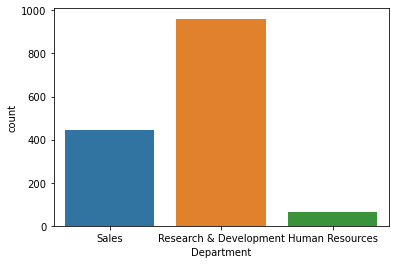

In [7]:
sns.countplot(hr['Department'])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

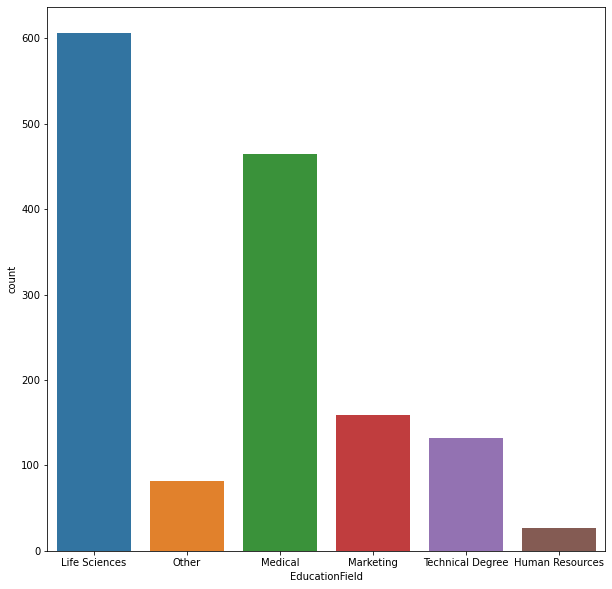

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(hr['EducationField'])

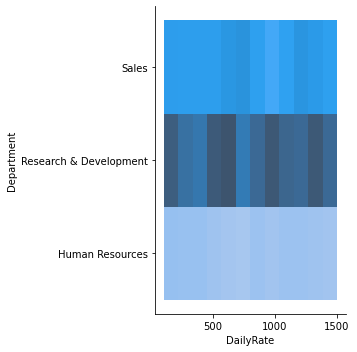

In [12]:
sns.displot(x = hr['DailyRate'],y = hr['Department'])

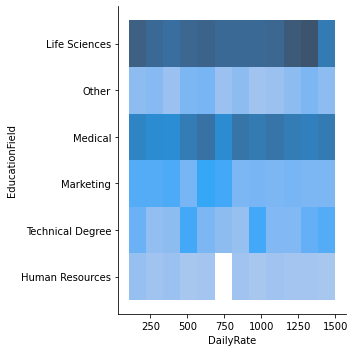

In [13]:
sns.displot(x = hr['DailyRate'],y = hr['EducationField'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='EducationField'>

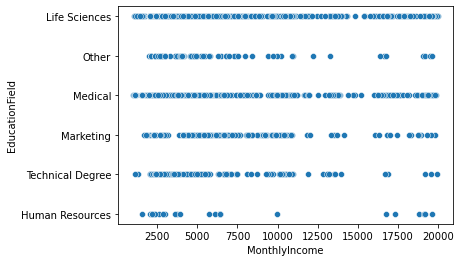

In [14]:
sns.scatterplot(x = hr['MonthlyIncome'], y = hr['EducationField'])

## Encoding:

In [31]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [32]:
hr['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [33]:
hr['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [34]:
hr['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [35]:
hr['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [36]:
hr['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [37]:
hr['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [22]:
hr['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [38]:
lb = LabelEncoder()
hr['Attrition'] = lb.fit_transform(hr['Attrition'])
hr['BusinessTravel'] = lb.fit_transform(hr['BusinessTravel'])
hr['Gender'] = lb.fit_transform(hr['Gender'])
hr['Department'] = lb.fit_transform(hr['Department'])
hr['EducationField'] = lb.fit_transform(hr['EducationField'])
hr['JobRole'] = lb.fit_transform(hr['JobRole'])
hr['OverTime'] = lb.fit_transform(hr['OverTime'])
hr['MaritalStatus'] = lb.fit_transform(hr['MaritalStatus'])

In [24]:
hr.duplicated().sum()

0

In [25]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Correlation

In [245]:
df_corr = hr.corr()
mask = np.triu(np.ones_like(hr.corr()))

<AxesSubplot:>

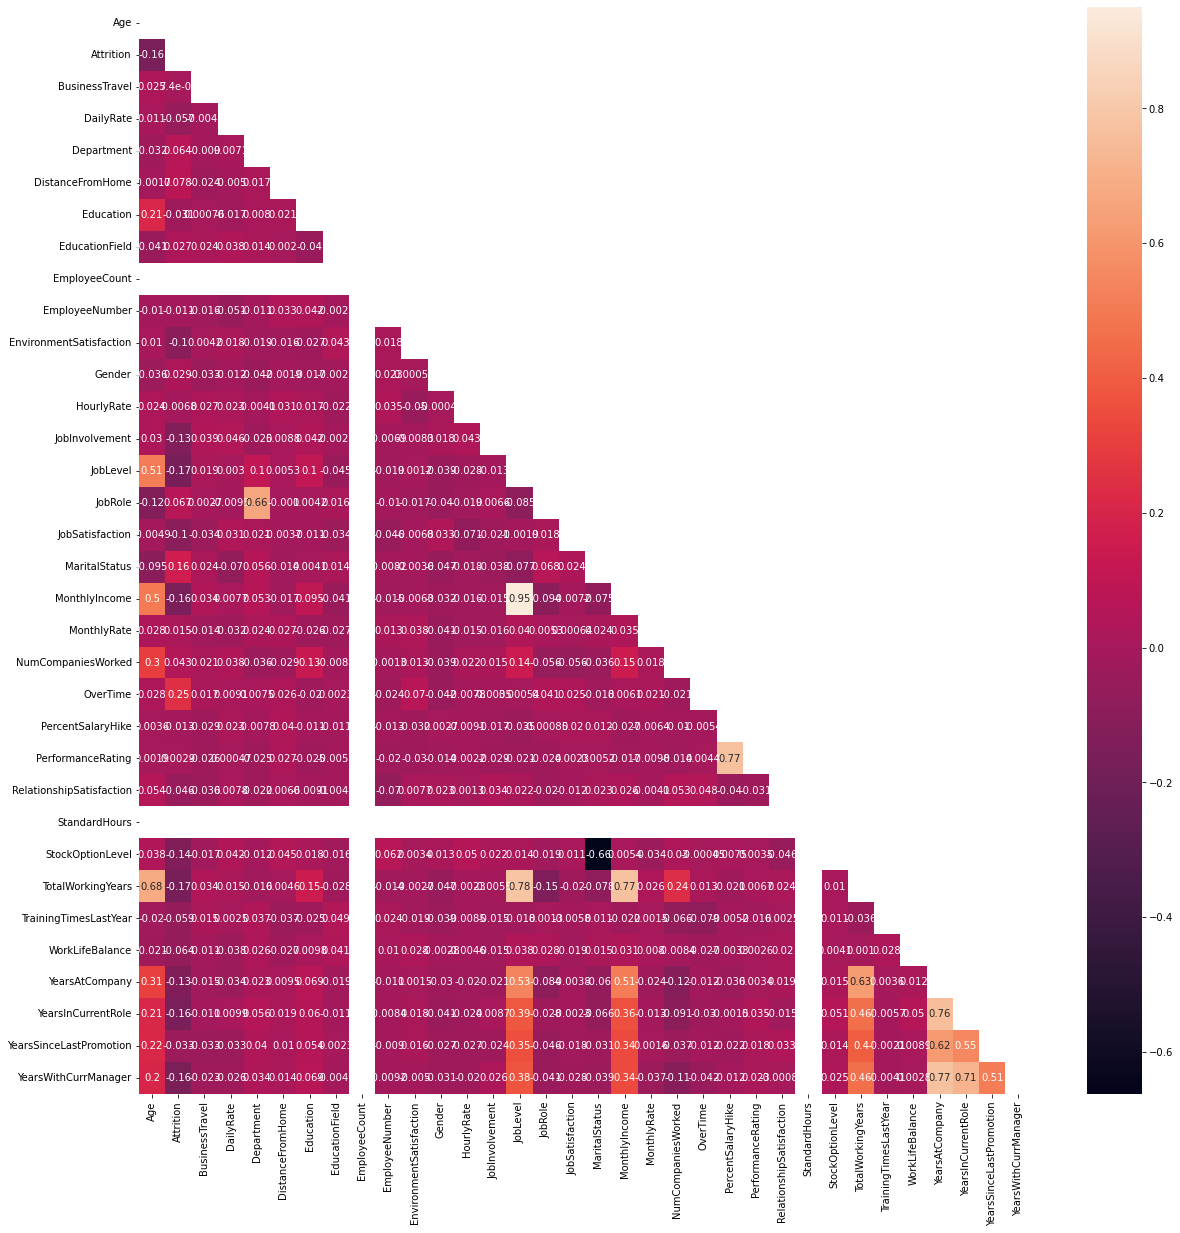

In [246]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True, mask = mask)

As EmployeeCount and StandardHours, has blank correlation, i.e. they may be of single data.

In [247]:
hr['EmployeeCount']

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [248]:
hr['StandardHours']

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [39]:
hr.drop(columns = ['StandardHours','EmployeeCount','Over18'],axis = 1,inplace = True)
hr.shape

(1470, 32)

**- Seperating Dependent and Independent columns.**

In [40]:
x = hr.drop(columns = ['Attrition'],axis =1)
y = hr.Attrition

**- Feature Selection.**

In [251]:
best_feature = SelectKBest(score_func = f_classif, k =30)
fit = best_feature.fit(x,y)

In [252]:
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [253]:
feature_score = pd.concat([column,score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(30,'Scores')

,Feature Name,Scores
19,OverTime,94.656457
24,TotalWorkingYears,44.252491
12,JobLevel,43.215344
15,MaritalStatus,39.599763
28,YearsInCurrentRole,38.838303
16,MonthlyIncome,38.488819
0,Age,38.175887
30,YearsWithCurrManager,36.712311
23,StockOptionLevel,28.140501
27,YearsAtCompany,27.001624


In [41]:
feat = ExtraTreesClassifier()
feat.fit(x,y)

ExtraTreesClassifier()

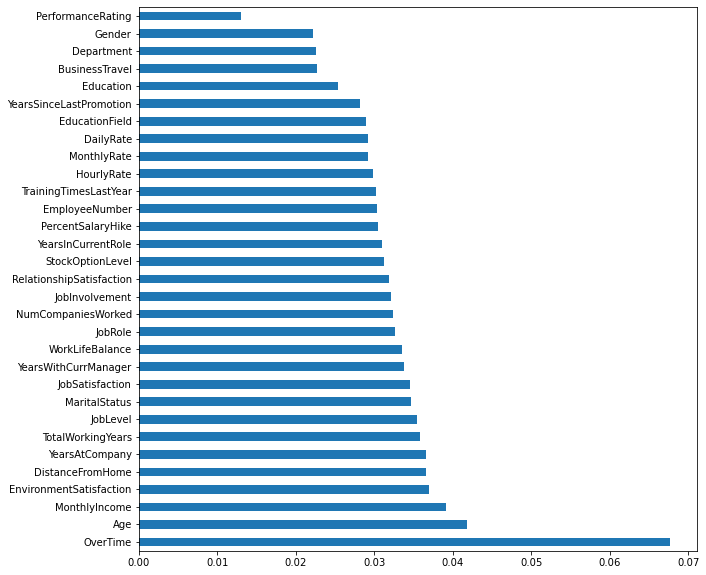

In [255]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

Taking top 21 Columns and also score is more than 5.

In [256]:
hr_new = hr[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','JobRole','Department','WorkLifeBalance','TrainingTimesLastYear']]

In [257]:
hr_new

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,WorkLifeBalance,TrainingTimesLastYear
0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1,0
1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,3,3
2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,3,3
3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,3,3
4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,3,3
1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,3,5
1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,3,0
1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,2,3


Final Dataset.

**- Correlation on new dataset.**

In [258]:
df = hr_new.corr()

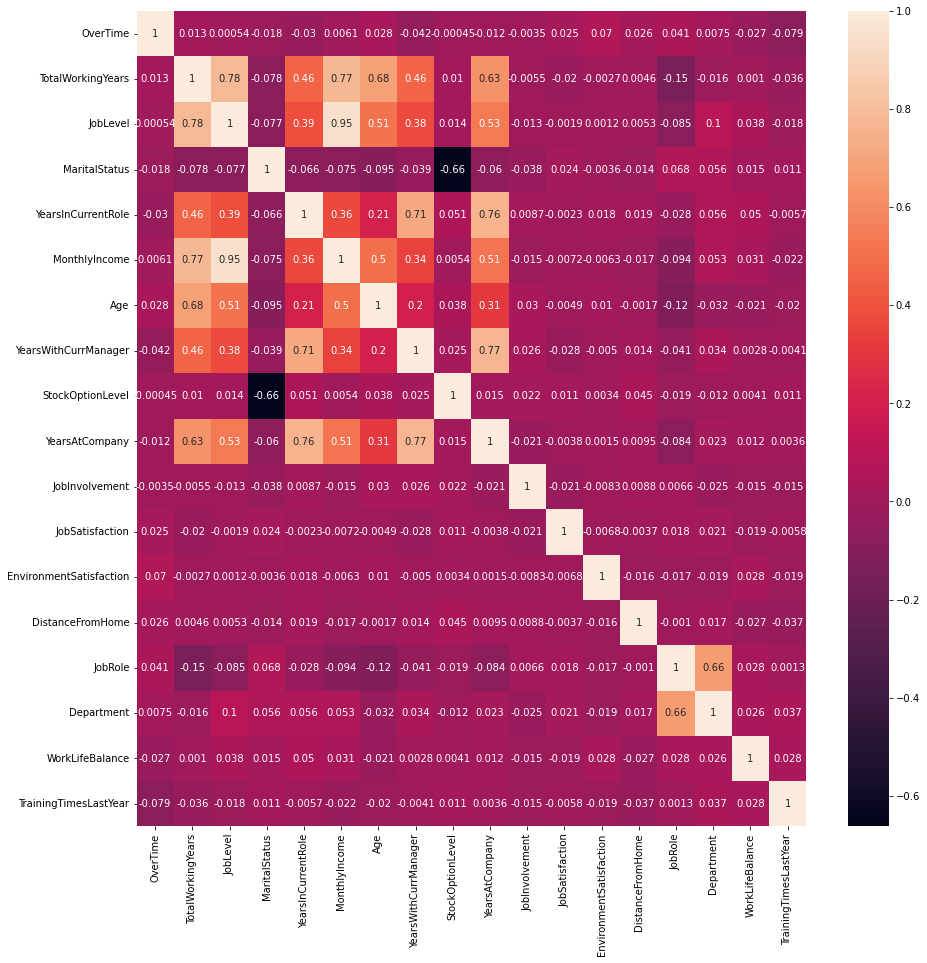

In [259]:
plt.figure(figsize = (15,15))
sns.heatmap(df, annot = True)
plt.show()

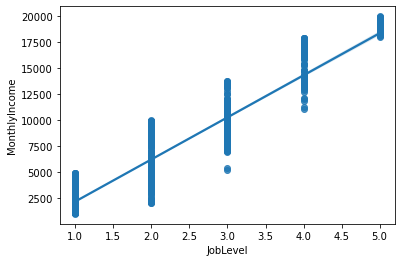

In [260]:
sns.regplot(hr_new['JobLevel'],hr_new['MonthlyIncome'])
plt.show()

JobLevel & MonthlyIncome,columns are 95% correlated, so dropping JobLevel.

In [261]:
hr_new.drop(['JobLevel'],axis = 1,inplace = True)
hr_new.shape

(1470, 17)

In [263]:
hr_new

,OverTime,TotalWorkingYears,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,WorkLifeBalance,TrainingTimesLastYear
0,1,8,2,4,5993,41,5,0,6,3,4,2,1,7,2,1,0
1,0,10,1,7,5130,49,7,1,10,2,2,3,8,6,1,3,3
2,1,7,2,0,2090,37,0,0,0,2,3,4,2,2,1,3,3
3,1,8,1,7,2909,33,0,0,8,3,3,4,3,6,1,3,3
4,0,6,1,2,3468,27,2,1,2,3,2,1,2,2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17,1,2,2571,36,3,1,5,4,4,3,23,2,1,3,3
1466,0,9,1,7,9991,39,7,1,7,2,1,4,6,0,1,3,5
1467,1,6,1,2,6142,27,3,1,6,4,2,2,4,4,1,3,0
1468,0,17,1,6,5390,49,8,0,9,2,2,4,2,7,2,2,3


In [264]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Training The Model

**- Scaling the features.**

In [266]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(hr_new)

**- Train Test Split.**

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 90)

**- Model Instantiating.**

In [268]:
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
svc = SVC()
dt = DecisionTreeClassifier()

**- Creating The function for the training and testing score.**

In [269]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- AdaBoost Classifier.**

In [270]:
ada.fit(x_train,y_train)
score(ada, x_train, x_test, y_train, y_test, train = True)
score(ada, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8911070780399274

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       925
           1       0.78      0.45      0.57       177

    accuracy                           0.89      1102
   macro avg       0.84      0.71      0.75      1102
weighted avg       0.88      0.89      0.88      1102


 ----- Confusion matrix ----- 
 [[902  23]
 [ 97  80]]

 ----- Test Result ----- 

Accuracy Score: 0.8668478260869565

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       308
           1       0.68      0.35      0.46        60

    accuracy                           0.87       368
   macro avg       0.78      0.66      0.69       368
weighted avg       0.85      0.87      0.85       368


 ----- Confusion matrix ----- 
 [[298  10]
 [ 39  21]]


**- Cross Validation Score.**

In [285]:
cross_val_score(ada, x_scaled, y, cv = 9).mean()

0.865292533293431

Cross validation score and accuracy are very close, so our model is fine, we dont face any over fitting problem in our model, And same for every model.

**- RandomForest Classifier.**

In [271]:
rf.fit(x_train,y_train)
score(rf, x_train, x_test, y_train, y_test, train = True)
score(rf, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       1.00      1.00      1.00       177

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


 ----- Confusion matrix ----- 
 [[925   0]
 [  0 177]]

 ----- Test Result ----- 

Accuracy Score: 0.875

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       308
           1       0.89      0.27      0.41        60

    accuracy                           0.88       368
   macro avg       0.88      0.63      0.67       368
weighted avg       0.88      0.88      0.85       368


 ----- Confusion matrix ----- 
 [[306   2]
 [ 44  16]]


**- Cross Validation Score.**

In [284]:
cross_val_score(rf, x_scaled, y, cv = 9).mean()

0.8585174655427535

**- SuperVector Machine.**

In [272]:
svc.fit(x_train,y_train)
score(svc, x_train, x_test, y_train, y_test, train = True)
score(svc, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8938294010889292

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       925
           1       0.94      0.36      0.52       177

    accuracy                           0.89      1102
   macro avg       0.92      0.68      0.73      1102
weighted avg       0.90      0.89      0.87      1102


 ----- Confusion matrix ----- 
 [[921   4]
 [113  64]]

 ----- Test Result ----- 

Accuracy Score: 0.8559782608695652

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.73      0.18      0.29        60

    accuracy                           0.86       368
   macro avg       0.80      0.59      0.61       368
weighted avg       0.84      0.86      0.82       368


 ----- Confusion matrix ----- 
 [[304   4]
 [ 49  11]]


**- Cross Validation Score.**

In [286]:
cross_val_score(svc, x_scaled, y, cv = 9).mean()

0.8591908158345387

**- DecisionTree Classifier.**

In [273]:
dt.fit(x_train,y_train)
score(dt, x_train, x_test, y_train, y_test, train = True)
score(dt, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       1.00      1.00      1.00       177

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


 ----- Confusion matrix ----- 
 [[925   0]
 [  0 177]]

 ----- Test Result ----- 

Accuracy Score: 0.7961956521739131

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       308
           1       0.38      0.42      0.40        60

    accuracy                           0.80       368
   macro avg       0.63      0.64      0.64       368
weighted avg       0.80      0.80      0.80       368


 ----- Confusion matrix ----- 
 [[268  40]
 [ 35  25]]


**- Cross Validation Score.**

In [288]:
cross_val_score(dt, x_scaled, y, cv = 9).mean()

0.7843658037807372

        AdaBoost Classifier Model, is giving the best accuracy score and also have no overfitting problem.

## Hyperparameter Tunning:

In [289]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [291]:
param = {'algorithm' : ['SAMME','SAMME.R'],
         'learning_rate' : [0.0,0.5,1.0],
         'n_estimators' : range(0,50),
         'random_state' : range(0,20)}

In [293]:
grid = GridSearchCV(estimator = ada, param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 46,
 'random_state': 0}

In [46]:
ada_hpt = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 46, random_state = 0)

In [295]:
ada_hpt.fit(x_train,y_train)
score(ada_hpt, x_train, x_test, y_train, y_test, train = True)
score(ada_hpt, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8820326678765881

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       925
           1       0.86      0.32      0.46       177

    accuracy                           0.88      1102
   macro avg       0.87      0.65      0.70      1102
weighted avg       0.88      0.88      0.86      1102


 ----- Confusion matrix ----- 
 [[916   9]
 [121  56]]

 ----- Test Result ----- 

Accuracy Score: 0.8777173913043478

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       308
           1       0.80      0.33      0.47        60

    accuracy                           0.88       368
   macro avg       0.84      0.66      0.70       368
weighted avg       0.87      0.88      0.86       368


 ----- Confusion matrix ----- 
 [[303   5]
 [ 40  20]]


Accuracy Score of our model is increased after tunning.

**- Saving the Model.**

In [47]:
filename = 'hr.pickle'
pickle.dump(ada_hpt, open(filename, 'wb'))